In [1]:
%%shell
jupyter nbconvert --to html /content/Noah_Schapera_Module_5_Part_I.ipynb

[NbConvertApp] Converting notebook /content/Noah_Schapera_Module_5_Part_I.ipynb to html
[NbConvertApp] Writing 506580 bytes to /content/Noah_Schapera_Module_5_Part_I.html


**This is the first half of the module 5 assignment. The full module 5 assignment will be due on Wednesday, April 6 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas.** 

**We discussed 1 and 2 dimensional random walks in class this week. In this assignment, you'll explore the behavior of particles and ensembles of particles performing random walks, but with slightly modified behaviors.  In particular, one modification that can lead to the formation of a variety of interesting patterns is called [Diffusion Limited Aggregation](http://paulbourke.net/fractals/dla/) (DLA).**

**0. List the names of your group members, as well as any other class members you conferred with for this assignment.**

Noah Schapera

**1. As you may notice from the link above, there are many different geometries used to implement DLA.**

**(a) Here, you'll assume that particles originate from the top wall of a box (assume the box is square with corners located at (0,0) and (H,H)). Particles are attracted to move downward toward the bottom of the box. How might you modify what we did in class to create a** ***directed*** **or** ***biased*** **random walk that attracts the particle toward the bottom of the box?**




In order to create biased random walk, we can add a bias term to the y coordinate update code that increases the value of y by a set amount each time step regardless of the random angle chosen.



**(b) Starting from the two-dimensional single particle random walk code we wrote in class, write a program whose inputs are the height of the box, the step size of the particle, the strength of the attraction toward the bottom, and the maximum number of steps the particle will take. Your program should create a particle with a random initial position along the top of the box, and the particle performs a directed random walk toward the bottom of the box. If the particle reaches the bottom of the box, the particle should stop moving, and your code should stop running. Your program should output the x and y components of the particle trajectory until the particle hits the lower boundary.**

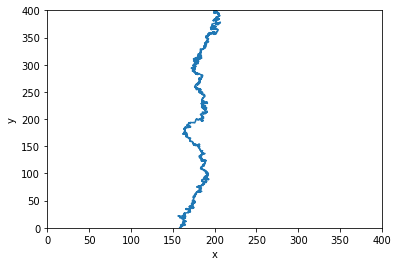

Floor


In [ ]:
import numpy as np
import numpy.random as nprnd
import matplotlib.pyplot as plt

#start with a single particle

def randomWalk2D(nSteps,x0,y0, H, attract, stepsize):
  x = np.zeros([nSteps,1])
  y = np.zeros([nSteps,1])
  returnCond=''
  x[0]=x0
  y[0]=y0
  m = stepsize

  for i in range(1,nSteps):
    ang = 2*np.pi*(nprnd.rand(1)-0.5) #uniformly distributed angles between -pi and +pi
#defined boundaries
  #hit left or right wall
    if x[i-1] + m*np.cos(ang) < 0 or x[i-1] + m*np.cos(ang) > H:
      #dont update x pos, update y pos normally
      x[i]=x[i-1]
      y[i] = y[i-1] + m*np.sin(ang) - attract
  #if hits top of box
    if y[i-1] + m*np.sin(ang) - attract > H:
      #set y = box height, update x pos normally
      y[i]=H
      x[i]=x[i-1] + m*np.cos(ang)
  #If hits bottom, return
    elif y[i-1] + m*np.sin(ang) - attract < 0:
      #set all remaining pos = current pos. 
      x[i:len(x)]=x[i-1]
      y[i:len(y)]=y[i]
      returnCond='Floor'
      return x,y,returnCond
  #normal conditions
    else:
      x[i] = x[i-1] + m*np.cos(ang)
      y[i] = y[i-1] + m*np.sin(ang) - attract
  
  returnCond='maxIter'
  return x,y,returnCond  

s = 10000
H=400
x,y,returnCond = randomWalk2D(s, H/2, H, H, 0.2,1)

fig,ax = plt.subplots(1,1)
ax.plot(x,y)
ax.set(xlabel='x',xlim=(0,H),ylabel='y',ylim=(0,H))
plt.show()
print(returnCond)

**(c) Run your program in (b) at least 5 times and save the outputs for boxSize = 100, stepSize = 1, attraction level of 0.2, and 1000 time steps. Plot the trajectories of the particles.  Does this behave the way you expect?**

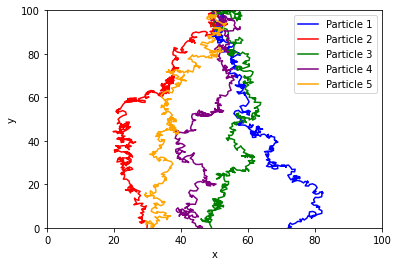

In [ ]:
b=100
x1,y1,returnCond1 = randomWalk2D(1000, b/2, b, b, 0.2,1)
x2,y2,returnCond2 = randomWalk2D(1000, b/2, b, b, 0.2,1)
x3,y3,returnCond3 = randomWalk2D(1000, b/2, b, b, 0.2,1)
x4,y4,returnCond4 = randomWalk2D(1000, b/2, b, b, 0.2,1)
x5,y5,returnCond5 = randomWalk2D(1000, b/2, b, b, 0.2,1)

fig,ax = plt.subplots(1,1)
ax.plot(x1,y1, color='blue', label = 'Particle 1')
ax.plot(x2,y2,color='red', label = 'Particle 2')
ax.plot(x3,y3,color='green', label = 'Particle 3')
ax.plot(x4,y4,color='purple', label = 'Particle 4')
ax.plot(x5,y5,color='orange', label = 'Particle 5')
ax.legend()
ax.set(xlabel='x',xlim=(0,b),ylabel='y',ylim=(0,b))
plt.show()

Yes, each of the random walks behave as expected and eventually trend toward y=0.

**(d) Building off of your single-particle code, write a program that produces trajectories for an ensemble of $N$ particles (where $N$ is an additional input into your code). Rather than creating trajectories in series (as we did for the one-dimensional random walk in class), create a program that will update the positions of multiple particles at each time step. Within your code, create a binary array that identifies which particles have reached the boundary (1 if yes, 0 if no). Store x and y positions in 2d arrays, and only update the positions of particles that are not on the boundary. For particles that are on the boundary, positions should be the same as the previous time step. This will be useful for the next steps.**

In [ ]:
def randomWalkParticles(nSteps,x0,y0, H, attract, stepsize,N):
  
  particles = np.zeros([nSteps,2,N])
  returnConds=np.zeros(N)
  # x = np.zeros([nSteps,1])
  # y = np.zeros([nSteps,1])
  returnCond=0
  particles[0,0,:]=x0
  particles[0,1,:]=y0
  m = stepsize

  for i in range(1,nSteps):
    for ii in range(N):
      if returnConds[ii] == 1:
        continue
      ang = 2*np.pi*(nprnd.rand(1)-0.5) #uniformly distributed angles between -pi and +pi
      #defined boundaries
      #left and right box sides
      if particles[i-1,0,ii] + m*np.cos(ang) < 0 or particles[i-1,0,ii] + m*np.cos(ang) > H:
        particles[i,1,ii]=particles[i-1,1,ii] + m*np.sin(ang) - attract
        particles[i,0,ii]=particles[i-1,0,ii]
      #dont go above the box
      if particles[i-1,1,ii] + m*np.sin(ang) - attract > H:
        particles[i,1,ii]=H
        particles[i,0,ii]=particles[i-1,0,ii] + m*np.cos(ang)
      #If hits bottom, return
      elif particles[i-1,1,ii] + m*np.sin(ang) - attract < 0:
        particles[i:nSteps,0,ii]=particles[i-1,0,ii]
        particles[i:nSteps,1,ii]=particles[i-1,1,ii]
        returnConds[ii]=1
      #normal conditions
      else:
        particles[i,0,ii] = particles[i-1,0,ii] + m*np.cos(ang)
        particles[i,1,ii] = particles[i-1,1,ii] + m*np.sin(ang) - attract
  return particles,returnConds 

**(e) Run your code for 100 particles, box size of 100, step size of 1, attraction of 0.2, and number of time steps of 1000. Plot all trajectories on the same axes using plt.plot(x.T,y.T). Does this plot look the way you expect?**

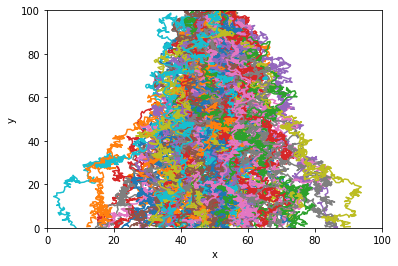

In [ ]:
particles,returnconds=randomWalkParticles(1000, 50, 100, 100, 0.2, 1, 100)
x=particles[:,0,:]
y=particles[:,1,:]
fig,ax = plt.subplots(1,1)
for i in range(particles.shape[2]):
  ax.plot(x.T[i,:],y.T[i,:])
ax.set(xlabel='x',xlim=(0,100),ylabel='y',ylim=(0,100))
plt.show()

Again, this plot alligns with what we expect. All of the particles begin at the center-top of the graph and cascade toward the bottom. Each particle evolves slightly differently than the rest, but its likely their final x-positions are normally distributed around x=50. 